In [1]:
from diatomic import *

### Example 3: Diatomic, Morse, Velocity-Verlet

In [2]:
atom1 = Atom(1.0, np.array([-1.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]))
atom2 = Atom(1.0, np.array([1.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]))
atoms = np.array([atom1, atom2])
potential = Morse(re = 1.0, a = 1.0, De = 1.0)
molecularSystem = MolecularSystem(atoms, potential)
integratorName = "velocityVerlet"
filepath = thisdir / 'temp_diat_morse_vv'
N = 10000
deltaT = 0.001
startTime = time.time()
molecularSystem = simulate(filepath, molecularSystem, integratorName, N, deltaT)
endTime = time.time()

In [3]:
aspath = filepath / 'AtomicSeparations.csv'
avdir = filepath / 'AtomicVelocities'
enpath = filepath / 'Energies.csv'

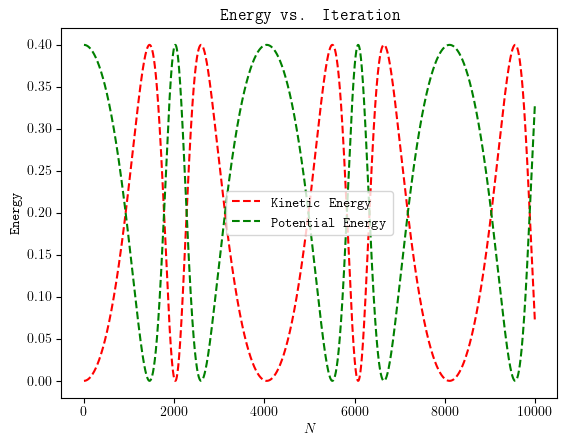

In [4]:
plotEnergies(enpath, "kp")

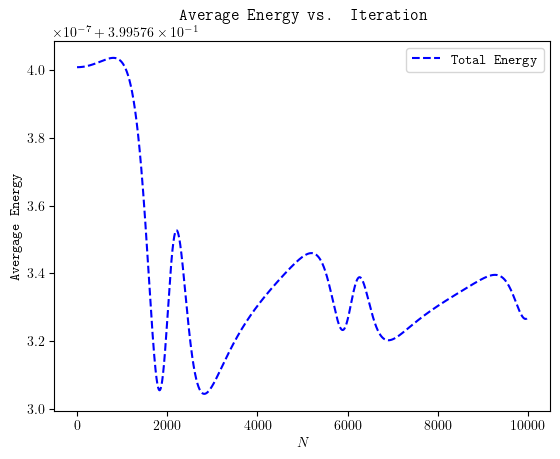

In [5]:
plotRunningAverageEnergies(enpath, "total")

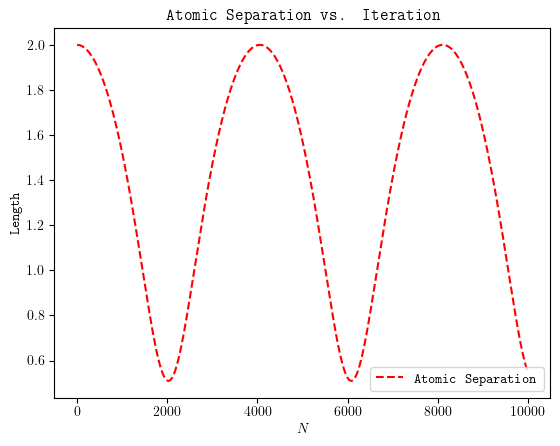

In [6]:
plotAtomicSeparations(aspath, "Atom1-Atom2")

In [7]:
fileNames = ["Atom1", "Atom2"]
vacf = calculateVacf(avdir, fileNames)
powerSpectrum = calculatePowerSpectrum(vacf)

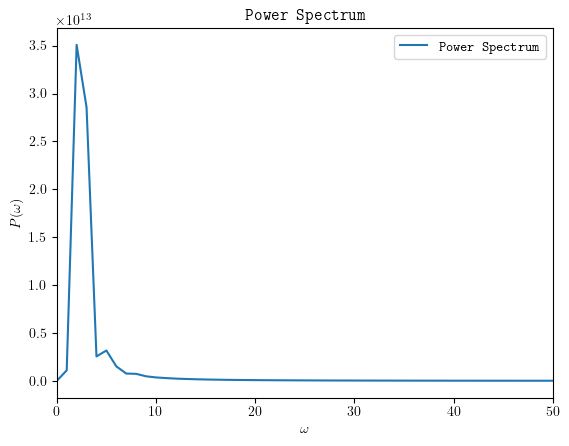

In [8]:
plotPowerSpectrum(avdir, powerSpectrum, [0.0, 50.0], False)

In [9]:
atomicSeparations = pd.read_csv(aspath)
energies = pd.read_csv(enpath)
vv = energies
print("Simulation Time:", round(endTime - startTime, 4), "seconds")
print("Initial Total Energy:", round(energies["TE"].iat[0], 4), "Hartree")
print("Final Total Energy:", round(energies["TE"].iat[-1], 4), "Hartree")
print("Average Total Energy:", round(np.mean(energies["TE"]), 4), u"\u00B1", round(np.std(energies["TE"]), 4), "Hartree")
print("Average Atomic Separation:", round(np.mean(atomicSeparations["Atom1-Atom2"]), 4), u"\u00B1", round(np.std(atomicSeparations["Atom1-Atom2"]), 4), "Bohr")

Simulation Time: 7.6785 seconds
Initial Total Energy: 0.3996 Hartree
Final Total Energy: 0.3996 Hartree
Average Total Energy: 0.3996 ± 0.0 Hartree
Average Atomic Separation: 1.4024 ± 0.5054 Bohr
